In [4]:
import psycopg
import os
import pandas as pd

connection = {"sslmode": "require", "target_session_attrs": "read-write"}
postgres_credentials = {
    "host": os.getenv("DB_DESTINATION_HOST"),
    "port": os.getenv("DB_DESTINATION_PORT"),
    "dbname": os.getenv("DB_DESTINATION_NAME"),
    "user": os.getenv("DB_DESTINATION_USER"),
    "password": os.getenv("DB_DESTINATION_PASSWORD"),
}

connection.update(postgres_credentials)

with psycopg.connect(**connection) as conn:
    with conn.cursor() as cur:
        sql = """
            select customer_id,
                   begin_date,
                   end_date,
                   type,
                   paperless_billing,
                   payment_method,
                   monthly_charges,
                   total_charges,
                   internet_service,
                   online_security,
                   online_backup,
                   device_protection,
                   tech_support,
                   streaming_tv,
                   streaming_movies,
                   gender,
                   senior_citizen,
                   partner,
                   dependents,
                   multiple_lines,
                   target
            from users_churn
        """
        cur.execute(sql)
        data = cur.fetchall()                       
        columns = [desc.name for desc in cur.description] 

df = pd.DataFrame(data, columns=columns)

In [5]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 64 

In [6]:
from sklearn.datasets import make_classification

data, target = make_classification(n_samples=100, n_features=5, random_state=42)

columns = [f"feature_{i}" for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=columns)
df['target'] = target

# первые пять строк
print(df.head())

print('-'*30)

# последние пять строк
print(df.tail()) 

   feature_0  feature_1  feature_2  feature_3  feature_4  target
0  -0.430668   0.672873  -0.724280  -0.539630  -0.651600       0
1   0.211646  -0.843897   0.534794   0.825848   0.681953       1
2   1.092675   0.409106   1.100096  -0.942751  -0.981509       0
3   1.519901  -0.773361   1.998053   0.155132  -0.385314       0
4  -0.453901  -2.183473   0.244724   2.591239  -0.484234       1
------------------------------
    feature_0  feature_1  feature_2  feature_3  feature_4  target
95   0.735948   1.203166   0.417673  -1.648321  -0.151785       0
96   0.846092  -1.140526   1.359706   0.861991   0.629629       1
97  -0.844677   1.643195  -1.533275  -1.411759  -1.612716       0
98  -1.282744   0.120370  -1.500776   0.450590   2.122156       1
99  -0.722168  -1.128686  -0.427958   1.560704  -1.024388       1


In [12]:
q75 = df["feature_1"].quantile(0.75)
print(q75)

1.190847306791705


In [7]:
import pandas as pd
from sklearn.datasets import make_classification


data, target = make_classification(n_samples=100, n_features=5, random_state=42)

columns = [f"feature_{i}" for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=columns)
df['target'] = target

print(df.describe())

        feature_0   feature_1   feature_2   feature_3   feature_4      target
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.031206    0.038332   -0.048848   -0.027714    0.029213    0.500000
std      0.894988    1.274375    1.230126    1.323957    1.007244    0.502519
min     -1.692005   -2.683180   -2.523434   -2.585909   -3.241267    0.000000
25%     -0.819243   -0.989945   -1.097573   -1.185113   -0.629925    0.000000
50%      0.098274   -0.098046   -0.035241    0.069846    0.054926    0.500000
75%      0.707311    1.190847    1.035708    1.089659    0.701519    1.000000
max      1.724002    2.489048    2.388694    2.591239    2.314659    1.000000


In [13]:
import pandas as pd
from sklearn.datasets import make_classification


data, target = make_classification(n_samples=100, n_features=5, random_state=42)

columns = [f"feature_{i}" for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=columns)
df['target'] = target


print(df.isnull().sum().sort_values(ascending=False))

feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
target       0
dtype: int64


In [14]:
from sklearn.datasets import make_classification

data, target = make_classification(n_samples=100, n_features=5, random_state=42)

columns = [f"feature_{i}" for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=columns)
df['target'] = target

df.dtypes 

feature_0    float64
feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
target         int64
dtype: object

In [15]:
x = "customer_segement"
y = "revenue"
agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).reset_index()

KeyError: 'customer_segement'

In [ ]:
import pandas as pd
import numpy as np

# сгенерируем небольшой набор данных для примера
data = {
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 
                 'Clothing', 'Electronics', 'Electronics', 'Clothing', 'Electronics', 
                 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Sales': [400, 300, 450, 200, 500, 550, 330, 480, 520, 350, 420, 290, 390, 410, 380]
}

df = pd.DataFrame(data)
# ваш код для агрегации данных
aggregated_df = df.groupby('Category').agg({'Sales': 'mean'}).reset_index()

# ваш код для сортировки данных
sorted_df = aggregated_df.sort_values(by='Sales', ascending=False)
sorted_df.reset_index(drop=True, inplace=True)
print(sorted_df)

In [ ]:
#Это хорошие примеры, на основе которых можно выделить общий паттерн в построении графиков:

import seaborn as sns
import matplotlib.pyplot as plt

# загрузка данных
# data = ...

# построение графика
sns.{тип_графика}(
    data=data,
    x={ось_х},
    y={ось_у},
    {другие_параметры_графика}
)
plt.title('Название графика')
plt.show() 

In [16]:
import seaborn as sns

data = sns.load_dataset("planets")

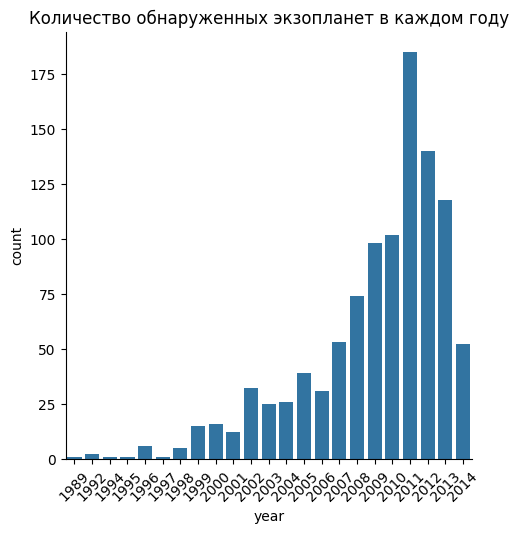

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# загрузка данных
data = sns.load_dataset("planets")

# допишите код здесь для построения графика catplot
sns.catplot(
    data=data,
    x="year", 
    kind="count",   # считаем количество объектов по году
    # height=5, aspect=2
)

plt.title('Количество обнаруженных экзопланет в каждом году')
plt.xticks(rotation=45)
plt.show()

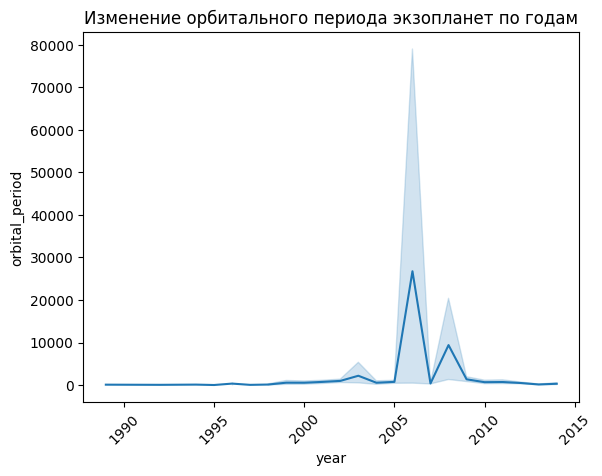

In [22]:
# допишите код здесь для построения графика lineplot
import seaborn as sns
import matplotlib.pyplot as plt

# загрузка данных
data = sns.load_dataset("planets")

sns.lineplot(
    data=data,
    x="year", 
    y="orbital_period"
)

plt.title("Изменение орбитального периода экзопланет по годам")
plt.xticks(rotation=45)
plt.show()

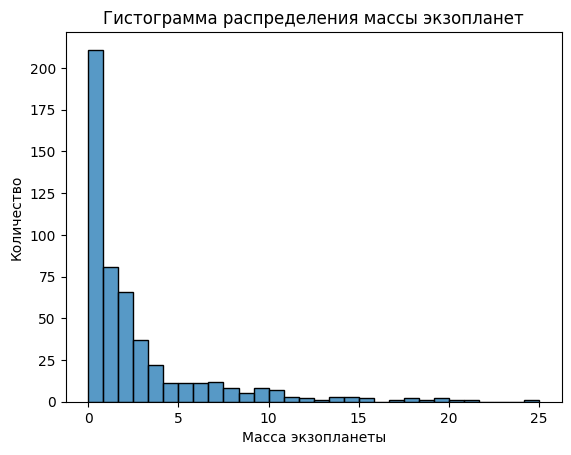

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# загрузка данных
data = sns.load_dataset("planets")

# строим гистограмму, исключая пропуски
sns.histplot(data["mass"].dropna(), bins=30, kde=False)

plt.title("Гистограмма распределения массы экзопланет")
plt.xlabel("Масса экзопланеты")
plt.ylabel("Количество")
plt.show()